# Basic usage of lklcom 


### Import libraries
First, we need to import some libraries. 

In [1]:
# Plotting libraries
import likelihood_combiner as lklcom
from likelihood_combiner.utils import get_sigmav_range
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# Reading the HDF5 file with pandas
import pandas as pd

### Path to input file
For this walk-through we are using mock data produced with gLike and translated in the lklcom hdf5 via lklcom.io.gLike_to_lklcom. However, lklcom can also read directly from the txt files produced by gLike.

In [2]:
# You can find this mock data in https://github.com/TjarkMiener/likelihood_combiner/input/mock_data.hdf5
mock_file = "/data2/users/tjark/likelihood_combiner/input/mock_data.hdf5"
output_dir = "/data2/users/tjark/likelihood_combiner/output/basic_usage/"
output_file = "/data2/users/tjark/likelihood_combiner/output/basic_usage_results.hdf5"

### J-Factor handling
The J-Factor is handled via an abstract class, which holds the common functions. Three differnt subclasses are currently implemented. Two subclasses handle the retrieving of the J-Factors with a built-in sets (Bonnivard et al. and Geringer-Sameth et al.). If you would like to use your own J-Factor set, you can hardcode the values in the Custom subclass or implement antoher subclass.

In [3]:
# You can init with an array of sources and a dictionary of collaborations/instruments.
# The values of this dictionary should hold the angular cut, the instrument
# is applying while data reduction.
geringer_jfactor = lklcom.jfactor.GeringerSameth(channel="tautau",
                                        sources=["Segue1", "Draco", "UrsaMajorII"],
                                        collaborations={"IACT": 0.12, "MAGIC": 0.1, "HAWC":2.6})
print(geringer_jfactor)
print(geringer_jfactor.get_logJ())
print(geringer_jfactor.get_DlogJ())

# An optional argument is the "combination_data". Here you can pass in the data input.
# It will parse through your input file (or input dir for gLike files) and select only valid J-Factors.
geringer_jfactor = lklcom.jfactor.GeringerSameth(channel="bb",
                                        sources=["Segue1", "Draco"],
                                        collaborations={"IACT": 2.6},
                                        combination_data=mock_file)
print(geringer_jfactor)
print(geringer_jfactor.get_logJ())
print(geringer_jfactor.get_DlogJ())


# The Bonnivard subclass works the same. 
bonnivard_jfactor = lklcom.jfactor.Bonnivard(channel="mumu",
                                        sources=["UrsaMajorII"],
                                        collaborations={"IACT": 0.1},
                                        combination_data=mock_file,
                                        precision=4)
print(bonnivard_jfactor)
print(bonnivard_jfactor.get_logJ())
print(bonnivard_jfactor.get_DlogJ())


# To hardcode the values, you can call the Custom subclass.
custom_logJ = {"Segue1": {"IACT": 19.25}}
custom_DlogJ = {"Segue1": {"IACT": 0.25}}
custom_jfactor = lklcom.jfactor.Custom(logJ=custom_logJ,
                                       DlogJ=custom_DlogJ,
                                       channel="mumu")
print(custom_jfactor)
print(custom_jfactor.get_logJ())
print(custom_jfactor.get_DlogJ())


{'Segue1': {'MAGIC': 18.94, 'IACT': 19.02, 'HAWC': 19.36}, 'Draco': {'HAWC': 19.05, 'MAGIC': 18.01, 'IACT': 18.12}, 'UrsaMajorII': {'MAGIC': 18.68, 'IACT': 18.79, 'HAWC': 19.42}}
{'Segue1': {'MAGIC': 0.37, 'IACT': 0.35, 'HAWC': 0.35}, 'Draco': {'HAWC': 0.21, 'MAGIC': 0.18, 'IACT': 0.15}, 'UrsaMajorII': {'MAGIC': 0.48, 'IACT': 0.46, 'HAWC': 0.42}}
{'Segue1': {'IACT': 19.36}}
{'Segue1': {'IACT': 0.35}}
{'UrsaMajorII': {'IACT': 18.9449}}
{'UrsaMajorII': {'IACT': 0.4038}}
{'Segue1': {'IACT': 19.25}}
{'Segue1': {'IACT': 0.25}}


### Lkl reading
The reading is handled by the abstract LklCom reader class. There are three subclasses. The recommended subclasses are the "LklCom_hdf5" for lklcom hdf5 file and "LklCom_txtdir" for gLike txt files in one directory. Those are the most efficient one, because it only reads the tables, when they are needed and free the memory afterwards. The "LklCom_custom" should be only used to hardcode the values.  

In [4]:
# In this walk-through we only demonstrate thee usage with the lklcom hdf5 file.
lklcom_reader_geringer = lklcom.reader.LklCom_hdf5(LklCom_jfactor_class=geringer_jfactor)
# This is reading the data table.
data = lklcom_reader_geringer()
print(data)


lklcom_reader_bonnivard = lklcom.reader.LklCom_hdf5(LklCom_jfactor_class=bonnivard_jfactor)
# This is reading the table for simulation nr. 15
data = lklcom_reader_bonnivard(simulation=15)
print(data)



lklcom_reader_custom = lklcom.reader.LklCom_hdf5(LklCom_jfactor_class=custom_jfactor,
                                        combination_data=mock_file)
# This is reading the table for simulation nr. 25
data = lklcom_reader_custom(simulation=25)
print(data)


{'Segue1': {'IACT': {'masses': array([   100.,    200.,    500.,   1000.,   2000.,   5000.,  10000.,
        20000.,  50000., 100000.], dtype=float32), 'sigmav_range': array([1.00000145e-28, 1.02329148e-28, 1.04713148e-28, ...,
       9.54994389e-19, 9.77238414e-19, 1.00000149e-18], dtype=float32), 'ts_values': array([[-3.83904e-06, -3.92846e-06, -4.01997e-06, ...,  3.56673e+04,
         3.64986e+04,  3.73493e+04],
       [-2.62588e-05, -2.68704e-05, -2.74963e-05, ...,  2.47741e+05,
         2.53513e+05,  2.59418e+05],
       [-1.28464e-04, -1.31457e-04, -1.34519e-04, ...,  1.13541e+06,
         1.16185e+06,  1.18892e+06],
       ...,
       [-1.09436e-05, -1.11985e-05, -1.14594e-05, ...,  4.87005e+05,
         4.98349e+05,  5.09958e+05],
       [ 8.32651e-07,  8.52046e-07,  8.71893e-07, ...,  2.02451e+05,
         2.07167e+05,  2.11993e+05],
       [ 2.43789e-06,  2.49468e-06,  2.55278e-06, ...,  9.39908e+04,
         9.61802e+04,  9.84206e+04]], dtype=float32)}}}
{'UrsaMajorII': {'IA

### DM-related stacked analysis 
Now, we can combine the data via the combiner function. It should be called with a sigmav range, LklCom reader class and a output directory.

In [5]:
# Get the standard sigmav range used for GloryDuck.
# However, custom sigmav ranges can be selected.
sigmav_range = get_sigmav_range()
print(sigmav_range)
# Call the combiner function to caluclate the UL for each simulation.
for simulation in np.arange(31):
    lklcom.combiner(sigmav_range=sigmav_range,
                    LklCom_reader_class=lklcom_reader_geringer,
                    output=output_dir,
                    simulations=[simulation])

# Merge the output files into one single hdf5 containing all ULs
lklcom.io.merge_to_lklcom(output_dir, output_file)

[1.000e-28 1.023e-28 1.047e-28 ... 9.550e-19 9.772e-19 1.000e-18]


The stacked analysis can also be performed via a function called "run_cluster()", which was initially created to run SLURM jobs on a computing farm. You can also run the cluster script on the command line:

```
lklcom-cluster [config/example_config.yml] [--channel CHANNEL]
    [--input INPUT_PATH] [--output OUTPUT_DIR] [--simulation SIMULATION]```

In [6]:
# Minimum settings for the combination.
settings = {
                'Data': {'buildin_j_factors': 'GeringerSameth', 'j_nuisance': True, 'simulations': 30},
                'Configuration': {'sources': ['Segue1', 'UrsaMajorII'], 'collaborations': {'IACT': 2.6}}
           }
# Run the cluster function with the basic settings.
for simulation in np.arange(settings['Data']['simulations']+1):
    lklcom.cluster.run_cluster(settings=settings,
                               channel="WW",
                               input=mock_file,
                               output=output_dir,
                               simulation=simulation)

# Merge the output files into one single hdf5 containing all ULs
lklcom.io.merge_to_lklcom(output_dir, output_file)

### Parallel processing via the local script
It is highly recommended to use the local script to automatically set up parallel processing for your analysis via python multiprocessing. You can run the local script on the command line:

On linux:
```lklcom-local [config/example_config.yml] [--input INPUT_PATH] [--output OUTPUT_FILE]```

On MacOS, Win:
```python scripts/local.py [config/example_config.yml] [--input INPUT_PATH] [--output OUTPUT_FILE]```


### Plot the sigmav ULs
The lklcom holds some functions (in plotter.py) to plot the results from the result hdf5 file.

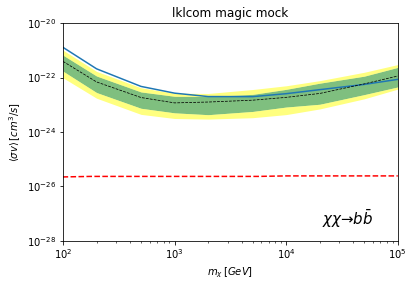

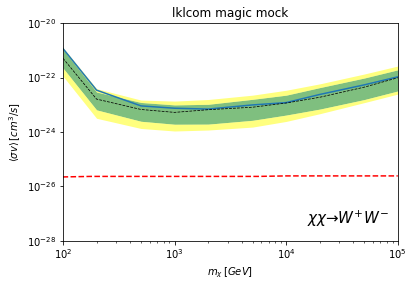

In [7]:
channels_LaTex = {
        "bb":"b\\bar{b}",
        "tautau":"\\tau^{+}\\tau^{-}",
        "mumu":"\mu^{+}\mu^{-}",
        "tt":"t\\bar{t}",
        "WW":"W^{+}W^{-}",
        "gammagamma":"\gamma\gamma",
        "hh":"hh",
        "ZZ":"ZZ",
        "ee":"e^{+}e^{-}"
    }

channels = ["bb", "WW"]

for channel in channels:
    fig, ax = plt.subplots()

    if channel != "gammagamma":
        ax = lklcom.plotter.plot_thermal_relic(ax=ax)

    ax = lklcom.plotter.plot_sigmav_ULs_from_hdf5(file=output_file, channel=channel, ax=ax, label = "magic comb")
    ax = lklcom.plotter.plot_sigmav_CLbands_from_hdf5(file=output_file, channel=channel, ax=ax)
    
    if channel != "gammagamma":
        ax.set_xbound(lower=100.0,upper=100000.0)
        ax.set_ybound(lower=1e-28,upper=1e-20)
    else:
        ax.set_xbound(lower=100.0,upper=25000.0)
        ax.set_ybound(lower=1e-30,upper=1e-20)
        
    ax.text(0.85, 0.1, r'$\chi\chi \to {}$'.format(channels_LaTex[str(channel)]), fontsize=15,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.title("lklcom magic mock")
    #plt.savefig(f'mock_{channel}.png')
    plt.show()